In [166]:
# import libaraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA

In [167]:
#import data
df = pd.read_csv("diabetes.csv")
# Remove all null data
df.dropna()
# Display the dataframe
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [168]:
# display information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [169]:
# Missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [170]:
# Duplicated values
df.duplicated().sum()

0

In [171]:
# Summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [172]:
# display correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


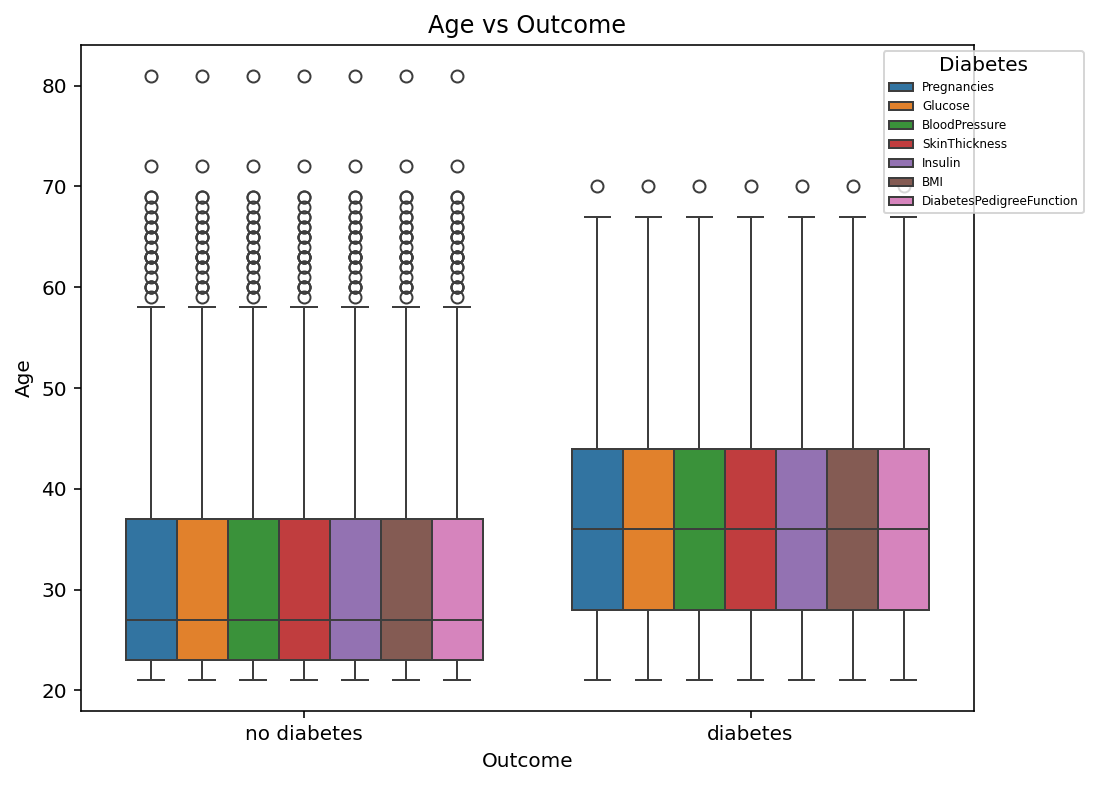

In [173]:
df_melted = pd.melt(df, id_vars=['Outcome', 'Age'], 
                    value_vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction'],
                    var_name='Diabetes', value_name='Presence')
# Increase figure size
plt.figure(dpi=144, figsize=(8, 6))
# Plot boxplot
ax = sns.boxplot(x='Outcome', y='Age', hue='Diabetes', data=df_melted)

# Set title and label
plt.title('Age vs Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.xticks([0, 1], ['no diabetes', 'diabetes'])
plt.legend(title='Diabetes', loc='upper right', fontsize='6', bbox_to_anchor=(1.13, 1))
#save image
plt.savefig('boxplot.png')
# Display plot
plt.show()

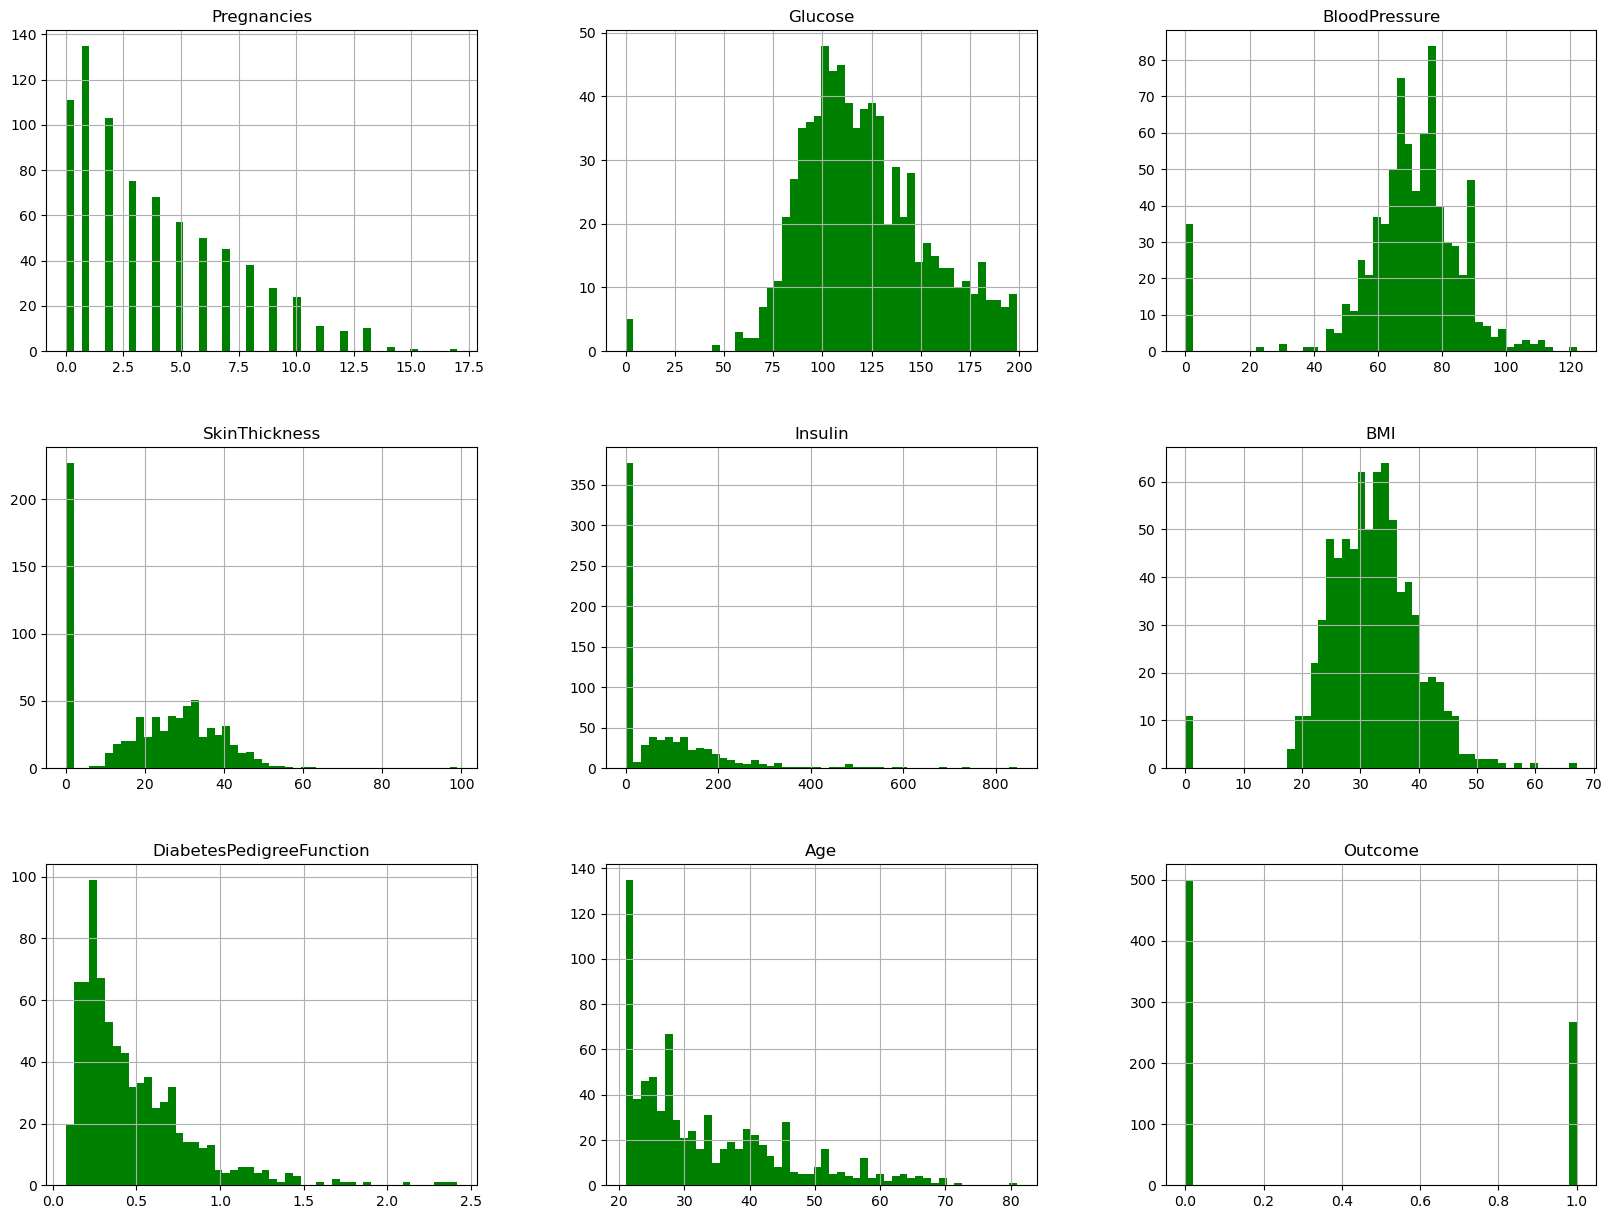

In [174]:
#histogram
df.hist(bins=50, color="green", figsize=(20,15))
plt.show()

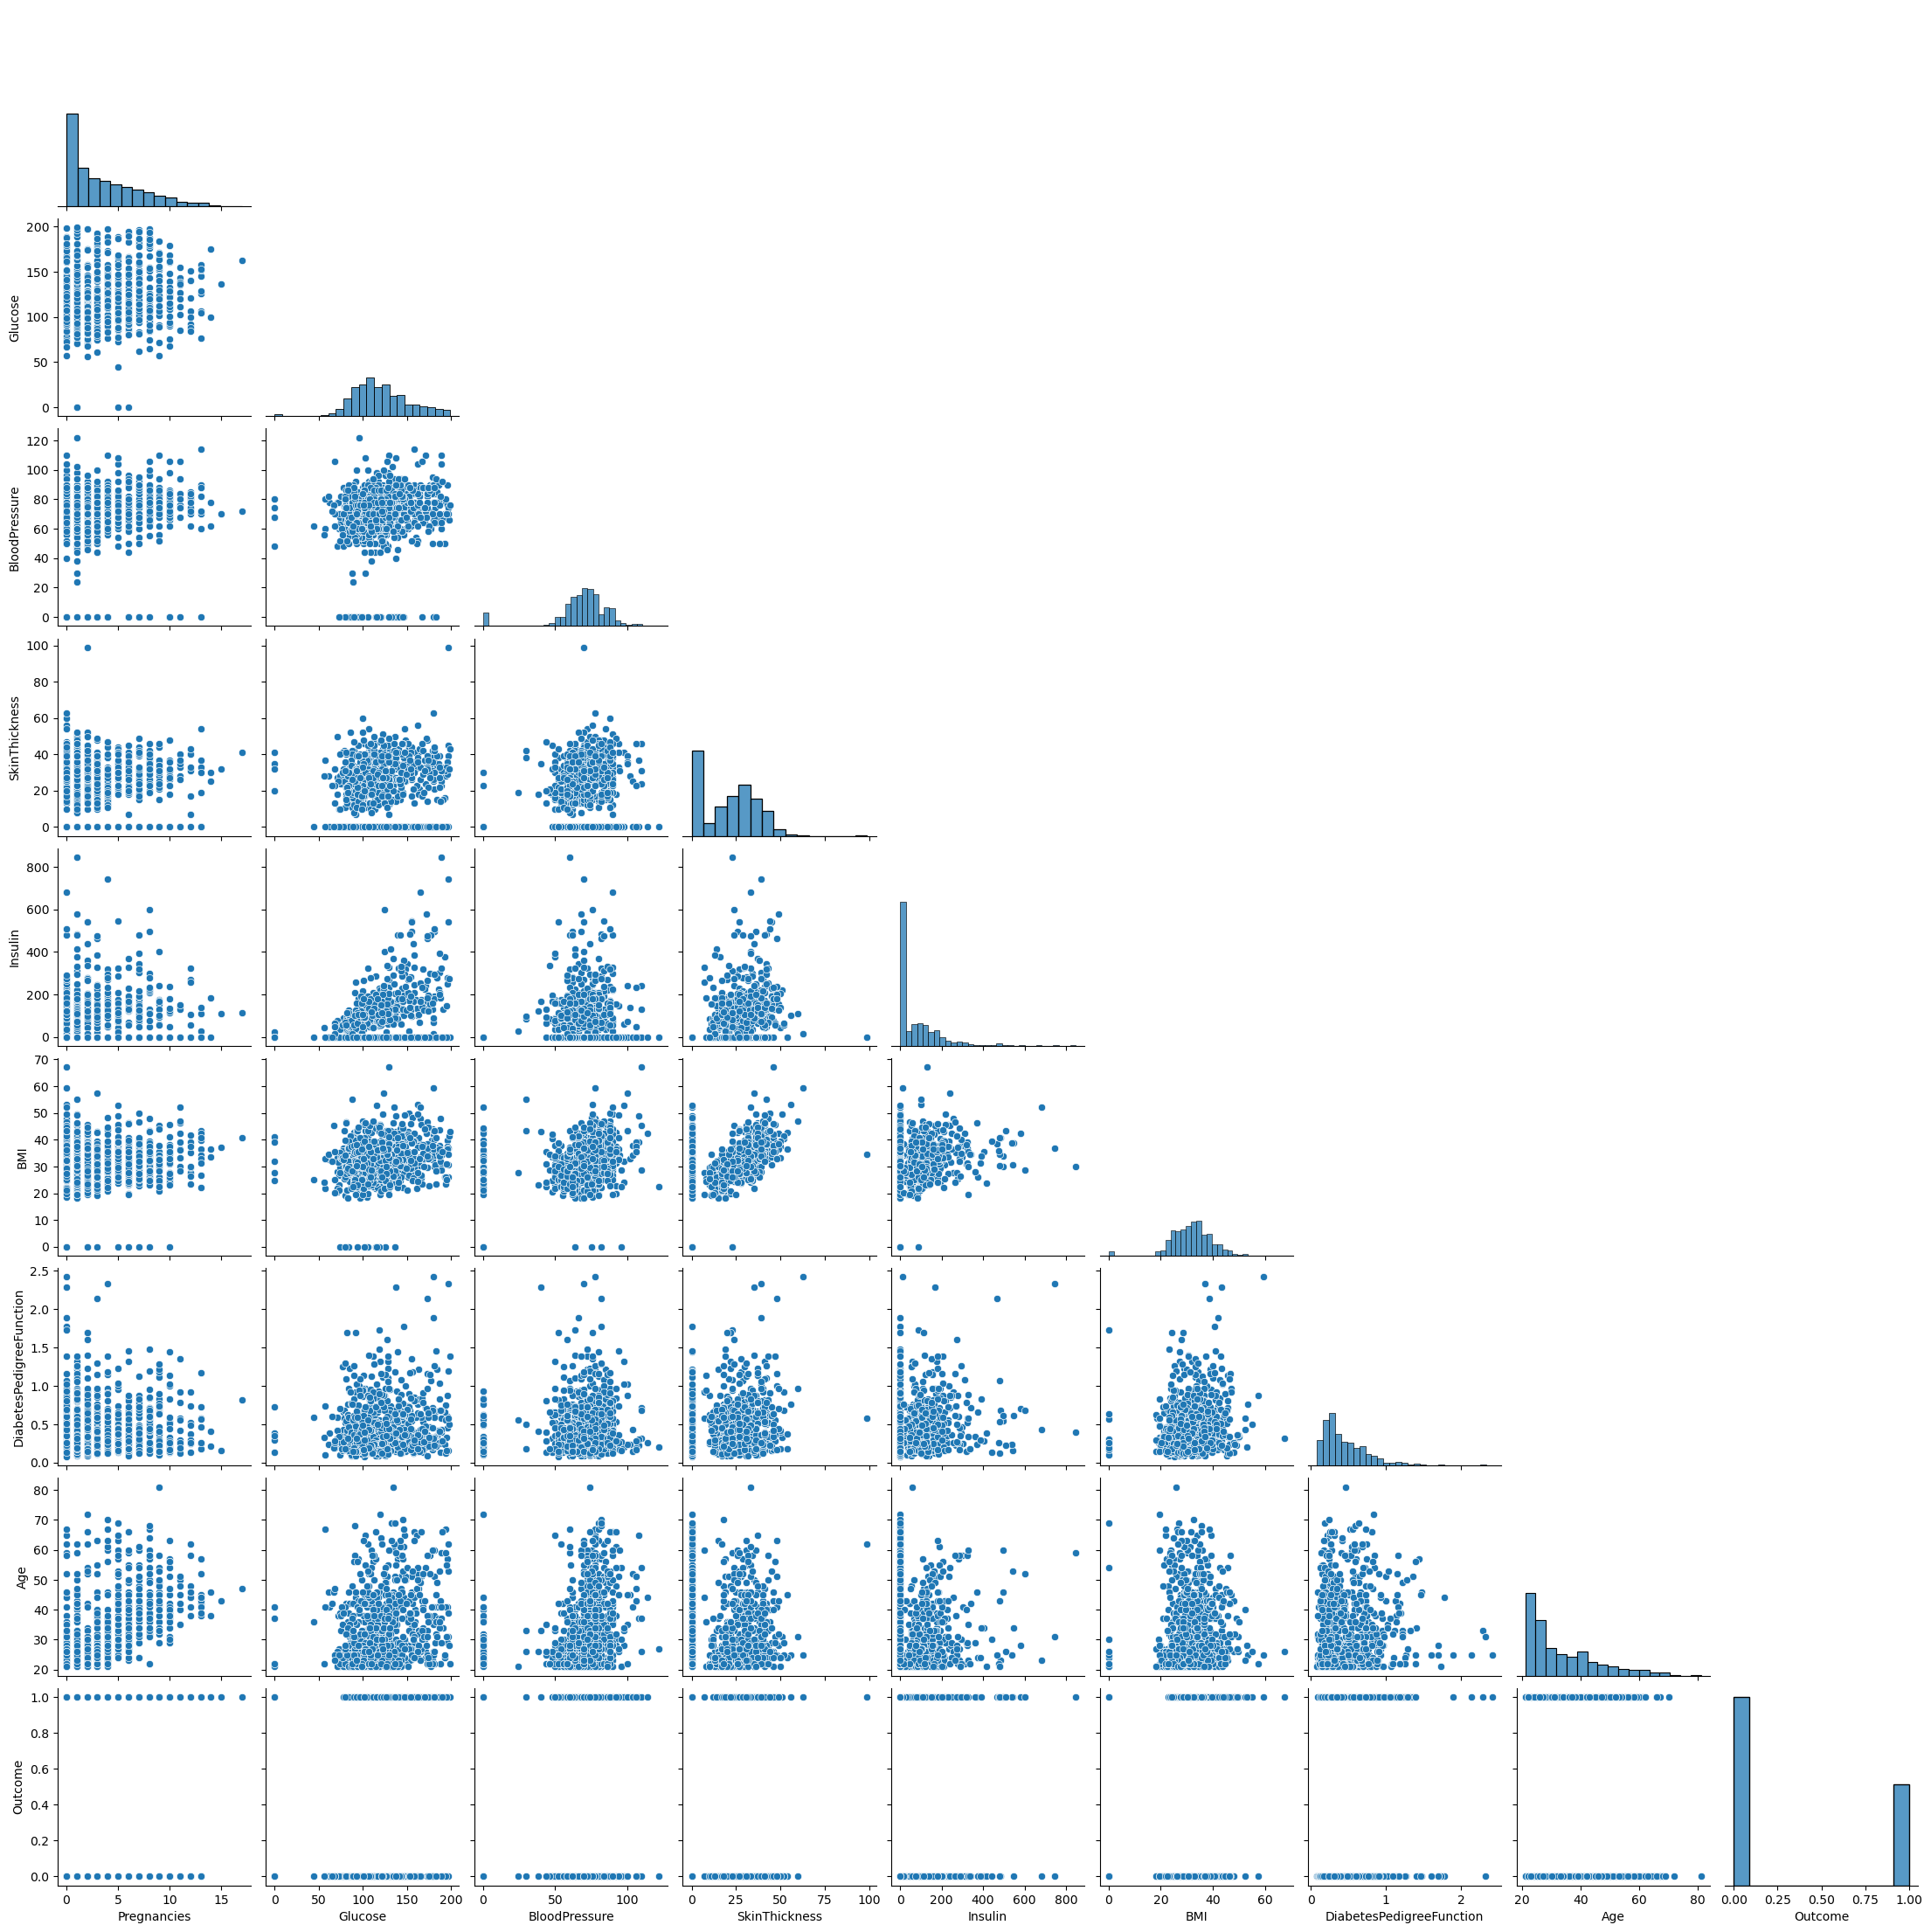

In [175]:
# Looking at some real data, where we don't know the number of clusters already
for col in df.columns:
    df[col] = pd.to_numeric(df[col])

sns.pairplot(df, corner=True)
plt.show()

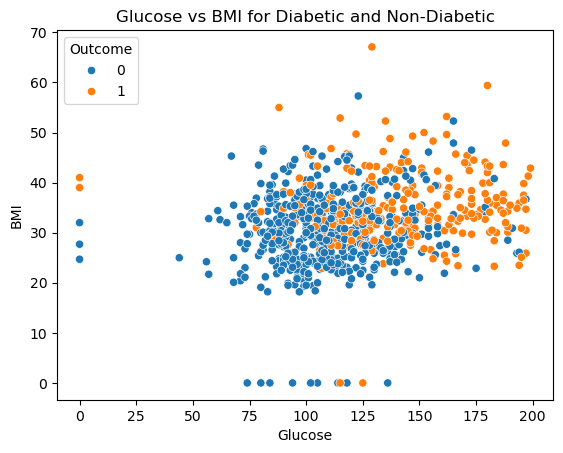

In [176]:
# Visualizing Glucose vs BMI, colored by Outcome
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=df)
plt.title('Glucose vs BMI for Diabetic and Non-Diabetic')
plt.show()

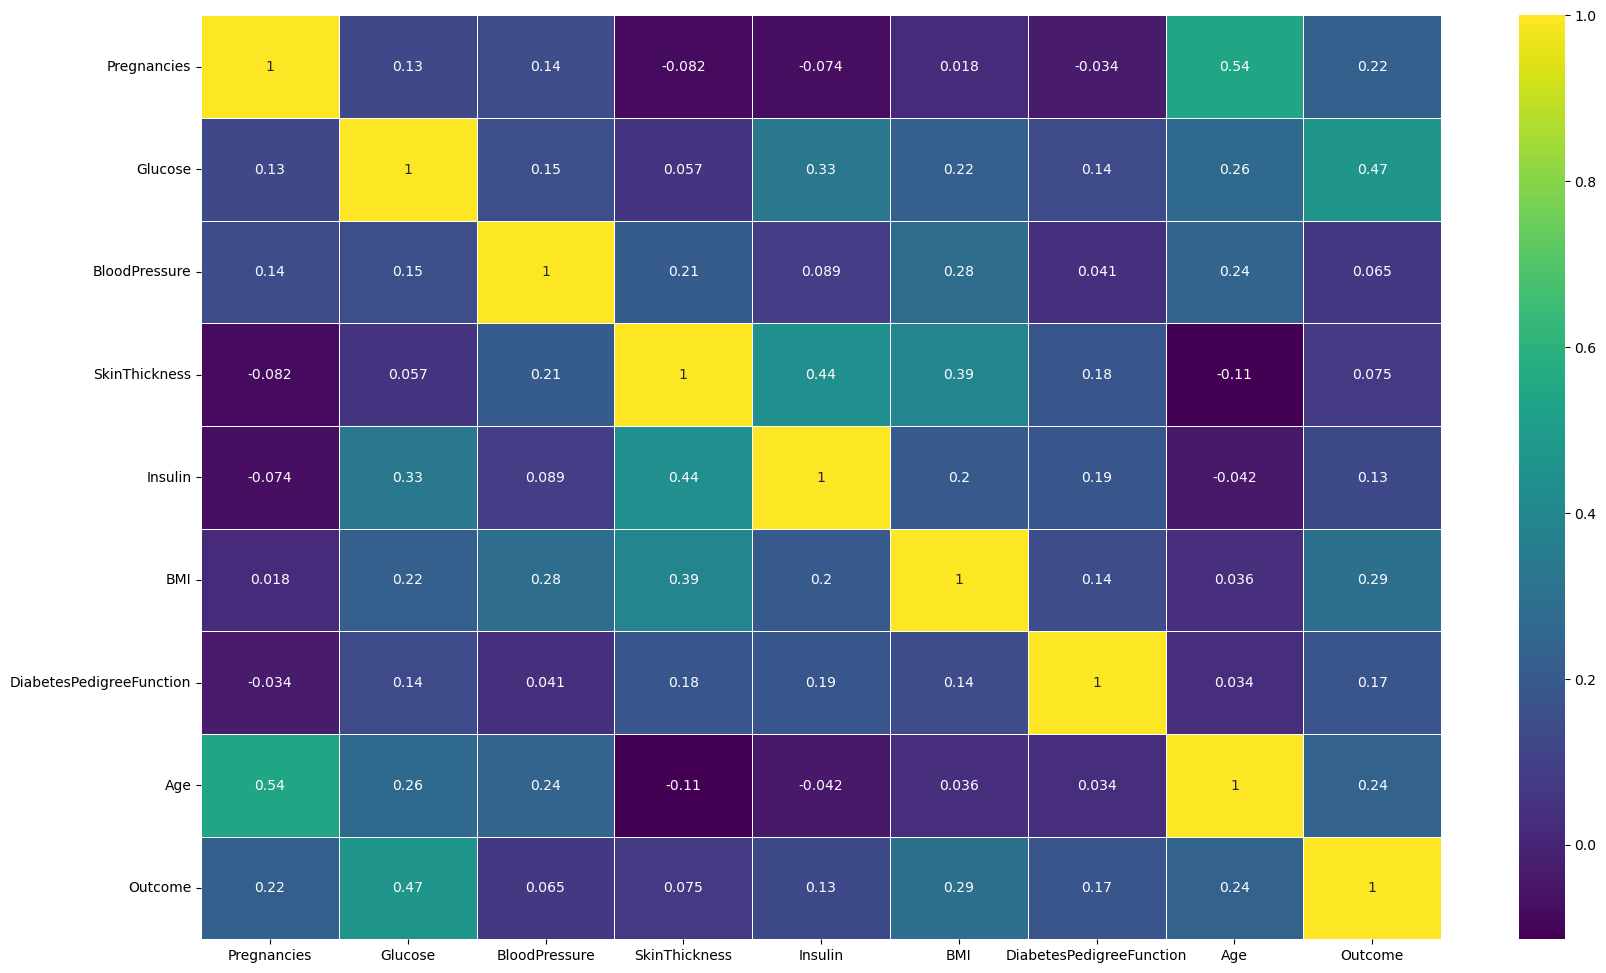

In [177]:
# Show correlation
fig, ax = plt.subplots(figsize = (20, 12))
ax = sns.heatmap(df.corr(), cmap='viridis', cbar=True, annot=True, linewidths=0.5,ax=ax)
# save image
plt.savefig('corr.png')
plt.show()

In [178]:
# Split data into features and target
X = df.drop(columns='Outcome')
Y = df['Outcome']

In [179]:
# Splitting the data
X_train, X_test, Y_train, Y_test  =  train_test_split(X,Y, test_size = 0.3, random_state=42)

In [180]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [181]:
# Test different K values
k_values = range(1, 20)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    accuracy_scores.append(accuracy)

# Find the best K
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")
print(f"Accuracy: {max(accuracy_scores)}")

Best K: 19
Accuracy: 0.7489177489177489


Principal Component Analysis (PCA)

In [183]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Explained Variance:", sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.25287567 0.22069924 0.13125855 0.10981888 0.09829499]
Total Explained Variance: 0.8129473229147895


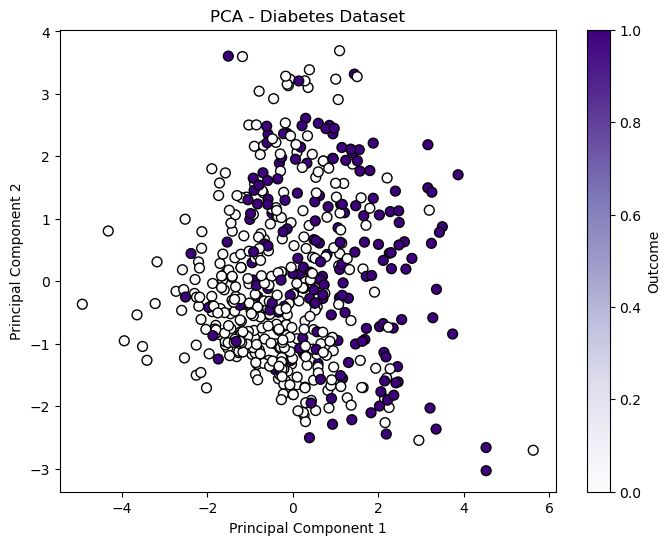

In [184]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='Purples', edgecolor='k', s=50)
plt.title("PCA - Diabetes Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Outcome")
plt.savefig('pca.png')
plt.show()

Accuracy (KNN with PCA): 0.7316017316017316

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       151
           1       0.64      0.51      0.57        80

    accuracy                           0.73       231
   macro avg       0.70      0.68      0.69       231
weighted avg       0.72      0.73      0.72       231



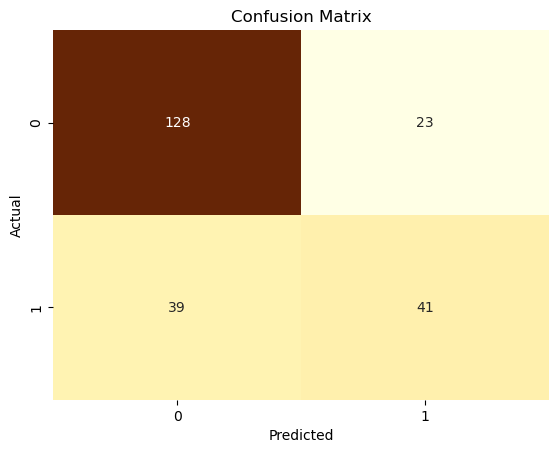

In [185]:
# Train model on PCA-transformed data
model = LogisticRegression()
model.fit(X_train_pca, Y_train)

# Predict and evaluate
y_pred = model.predict(X_test_pca)
print(f"Accuracy (KNN with PCA): {accuracy_score(Y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
# Confusion matrix heatmap
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='YlOrBr', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('PCA-transform.png')
plt.show()

Synthetic Minority Over-sampling Technique (SMOTE)

Accuracy (KNN with SMOTE): 0.7012987012987013

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75       151
           1       0.55      0.75      0.63        80

    accuracy                           0.70       231
   macro avg       0.69      0.71      0.69       231
weighted avg       0.74      0.70      0.71       231

Confusion Matrix:
 [[102  49]
 [ 20  60]]


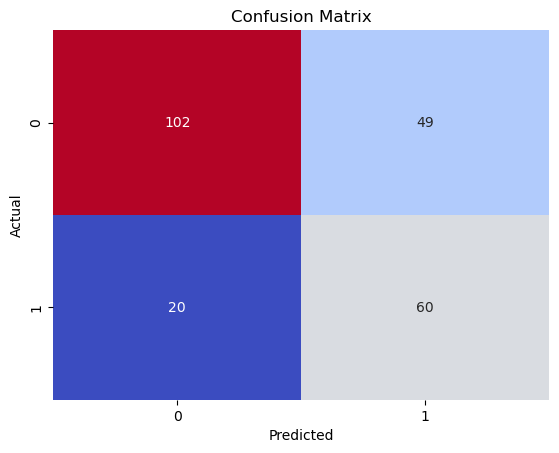

In [187]:
# Handling Class Imbalance
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, Y_train)

# Train KNN on balanced data
knn_smote = KNeighborsClassifier(n_neighbors=best_k)
knn_smote.fit(X_train_balanced, y_train_balanced)

# Evaluate
y_pred_smote = knn_smote.predict(X_test)
print(f'Accuracy (KNN with SMOTE): {accuracy_score(Y_test, y_pred_smote)}')

# Evaluate the model
print("\nClassification Report:\n", classification_report(Y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_smote))
# Confusion matrix heatmap
sns.heatmap(confusion_matrix(Y_test, y_pred_smote), annot=True, fmt='d', cmap='coolwarm', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('smote.png')
plt.show()

In [188]:
# Experimenting with different distance metrics
metrics = ['euclidean', 'manhattan', 'minkowski']

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, Y_train)
    accuracy = knn.score(X_test, Y_test)
    print(f'Accuracy for KNN with {metric} distance: {accuracy}')

Accuracy for KNN with euclidean distance: 0.7489177489177489
Accuracy for KNN with manhattan distance: 0.70995670995671
Accuracy for KNN with minkowski distance: 0.7489177489177489


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       151
           1       0.68      0.51      0.59        80

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231

Confusion Matrix:
 [[132  19]
 [ 39  41]]


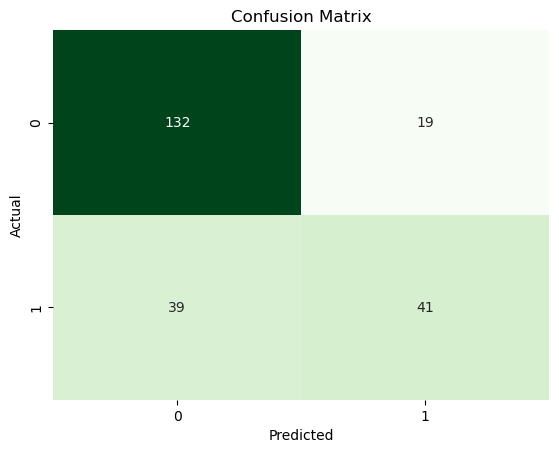

In [189]:
# Train the model with the best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate performance
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

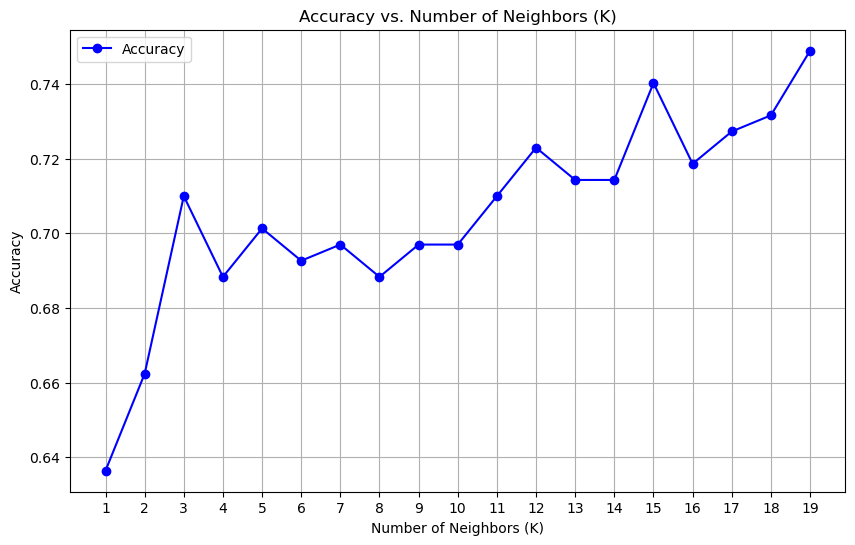

In [190]:
# Try different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', color='b', label='Accuracy')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

In [191]:
# Weighted KNN
weighted_knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
weighted_knn.fit(X_train, Y_train)

# Make predictions and evaluate
y_pred_weighted = weighted_knn.predict(X_test)
print(f' Accuracy (Weighted KNN): {accuracy_score(Y_test, y_pred_weighted)}')

 Accuracy (Weighted KNN): 0.7575757575757576


Classification Report (KD-Tree):
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       151
           1       0.68      0.51      0.59        80

    accuracy                           0.75       231
   macro avg       0.73      0.69      0.70       231
weighted avg       0.74      0.75      0.74       231

Confusion Matrix (KD-Tree):
 [[132  19]
 [ 39  41]]


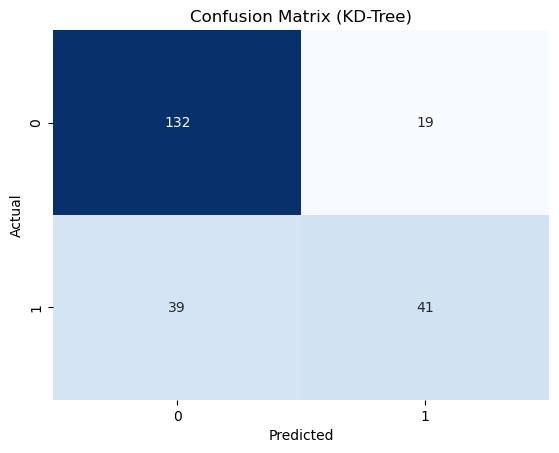

In [192]:
# Initialize KNN with KD-Tree
knn_kd = KNeighborsClassifier(n_neighbors=best_k, algorithm='kd_tree')

# Fit the model
knn_kd.fit(X_train, Y_train)

# Predict outcomes
y_pred_kd = knn_kd.predict(X_test)

# Evaluate performance
print("Classification Report (KD-Tree):\n", classification_report(Y_test, y_pred_kd))
print("Confusion Matrix (KD-Tree):\n", confusion_matrix(Y_test, y_pred_kd))

# Confusion matrix heatmap for KD-Tree
sns.heatmap(confusion_matrix(Y_test, y_pred_kd), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (KD-Tree)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('kda.png')
plt.show()